# 2. Customer "Segmentation" Classification

For this task, our target variable is the `Segmentation` variable, which has been provided by the company with possible levels (A, B, C, D). We have not been given information on what these segments mean to the company, but we are to assume these groupings are meaningful to the communications department, which plans to do targetted advertising outreach based on these groupings based on previous successful targetted advertising. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

%matplotlib inline

To start, we read out data set, since it was already divided into different output documents (X_train, X_test, y_train, and y_test) before. Then, the we will fit different machine learning models to classify the target variable: KNN Classifier, Naive Bayes, Decision Tree and Random Forest.

In [2]:
X_train = pd.read_csv('data-segmentation/X_train.csv', index_col = 0)
X_test = pd.read_csv('data-segmentation/X_test.csv', index_col = 0)
y_train = pd.read_csv('data-segmentation/y_train.csv', index_col = 0)
y_test = pd.read_csv('data-segmentation/y_test.csv', index_col = 0)
target_names = y_train.Segmentation.unique()


### KNN Classifier

[2]


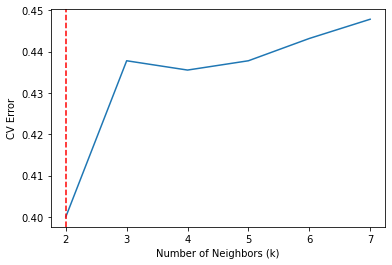

In [3]:
#Cross validation to determine what is the optimal number of neighbors for the KNN model
knn_cverrs = []
for i in range(2,8):
    knn_segmentation = KNeighborsClassifier(n_neighbors=i)
    CV_error = np.mean(cross_val_score(knn_segmentation, X_train, y_train.Segmentation, cv=10))
    knn_cverrs.append(CV_error)
#Model Accuracy
best_acc = np.where(CV_error == np.max(CV_error))[0]+2
print(best_acc)

x_graph = list(range(2,8))
plt.plot(x_graph,knn_cverrs)
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("CV Error")
plt.axvline(x=best_acc,linestyle='--',color="red")
plt.show()

Confusion matrix: 
 [[279 197 126  90]
 [189 117  96  48]
 [140 117 103  21]
 [213 159 102 157]]
Classification report: 
               precision    recall  f1-score   support

           D      0.340     0.403     0.369       692
           B      0.198     0.260     0.225       450
           C      0.241     0.270     0.255       381
           A      0.497     0.249     0.332       631

    accuracy                          0.305      2154
   macro avg      0.319     0.296     0.295      2154
weighted avg      0.339     0.305     0.308      2154

KNN Accuracy: 
 0.3045496750232126


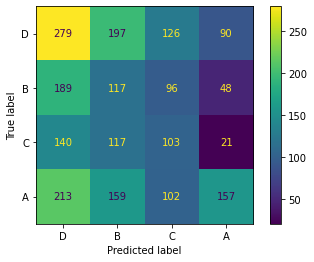

In [4]:
#fit the model with 2 neighbors, which is the optimal number.
knn_segmentation = KNeighborsClassifier(n_neighbors=2)
knn_segmentation.fit(X_train, y_train.values.ravel())
# predict
y_pred = knn_segmentation.predict(X_test)
#Model confusion matrix
cm_segmentation = confusion_matrix(y_test,y_pred)
print(f'Confusion matrix: \n {cm_segmentation}')
knn_report = classification_report(y_test, y_pred, digits=3,target_names=target_names)
print(f'Classification report: \n {knn_report}')
#Model Accuracy
knn_accuracy = metrics.accuracy_score(y_test,y_pred)
print(f'KNN Accuracy: \n {knn_accuracy}')

#Model confusion matrix
dissplay_cm_segmentation = ConfusionMatrixDisplay(confusion_matrix=cm_segmentation,
                                           display_labels=target_names)
dissplay_cm_segmentation.plot()

With the prevous results, it was easier to classify the people in the D segmentation customers than the other 3 groups of customers. Segmentation B had the lowest precision (0.198), but also has the lowest number of samples. But overall, the KNN classifier does not perform well with this data, which can be seen in the F1-scores ranging from 0.225 to 0.369).

### Naive Bayes

Confusion matrix: 
 [[171  41 272 208]
 [124  34 188 104]
 [ 91  31 198  61]
 [137  38 202 254]]
Classification report: 
               precision    recall  f1-score   support

           D      0.327     0.247     0.281       692
           B      0.236     0.076     0.114       450
           C      0.230     0.520     0.319       381
           A      0.405     0.403     0.404       631

    accuracy                          0.305      2154
   macro avg      0.300     0.311     0.280      2154
weighted avg      0.314     0.305     0.289      2154

NB Accuracy: 
 0.3050139275766017


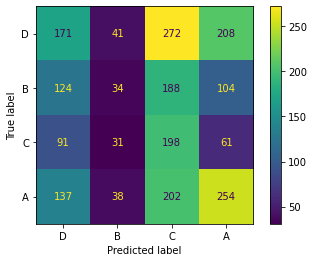

In [5]:
#fit the model
modelNB = GaussianNB()
modelNB.fit(X_train, y_train.values.ravel())
# predict
y_pred = modelNB.predict(X_test)
#Model confusion matrix
cm_segmentation = confusion_matrix(y_test,y_pred)
print(f'Confusion matrix: \n {cm_segmentation}')
nb_report = classification_report(y_test, y_pred, digits=3,target_names=target_names)
print(f'Classification report: \n {nb_report}')
#Model confusion matrix
dissplay_cm_segmentation = ConfusionMatrixDisplay(confusion_matrix=cm_segmentation,display_labels=target_names)
dissplay_cm_segmentation.plot()

#nb Model Accuracy
nb_accuracy = metrics.accuracy_score(y_test,y_pred)
print(f'NB Accuracy: \n {nb_accuracy}')

With the prevous results, overall, Naive Bayes does not perform well with the data, which can be seen in the F1-scores ranging from 0.114 to 0.404) performing worst with segmentation group B.

### Decision Tree Classification

The first decision tree classifier has the maximum depth of the tree limited to 7 since after pruning the tree, the accuracry, and precision after this depth has no significant change. In the second decision tree classifier, we limited the maximum leaf nodes instead hwere best nodes are defined as relative reduction in impurity.

Confusion matrix: 
 [[171  41 272 208]
 [124  34 188 104]
 [ 91  31 198  61]
 [137  38 202 254]]
Classification report: 
               precision    recall  f1-score   support

           D       0.38      0.36      0.37       692
           B       0.26      0.31      0.28       450
           C       0.27      0.27      0.27       381
           A       0.43      0.39      0.41       631

    accuracy                           0.34      2154
   macro avg       0.33      0.33      0.33      2154
weighted avg       0.35      0.34      0.34      2154

DTC Accuracy: 
 0.3050139275766017


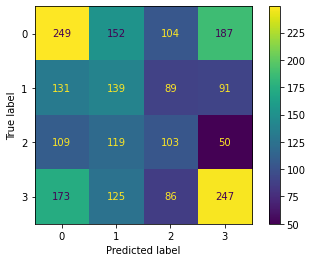

In [13]:
#fit the model
dtc = DecisionTreeClassifier(max_depth=7)
dtc.fit(X_train, y_train)
#Model confusion matrix
cm_segmentation = confusion_matrix(y_test,y_pred)
print(f'Confusion matrix: \n {cm_segmentation}')
dtc_report = classification_report(y_test, dtc.predict(X_test),target_names=target_names)
print(f'Classification report: \n {dtc_report}')
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtc.predict(X_test)))
cm.plot()

#dtc Model Accuracy
dtc_accuracy = metrics.accuracy_score(y_test,y_pred)
print(f'DTC Accuracy: \n {dtc_accuracy}')

Although the accuracy of this model is low, this model performs a bit better than the preovous ones, having a f1-score of 0.41, which means that segmentation coup A is easier to classify than the other groups. 

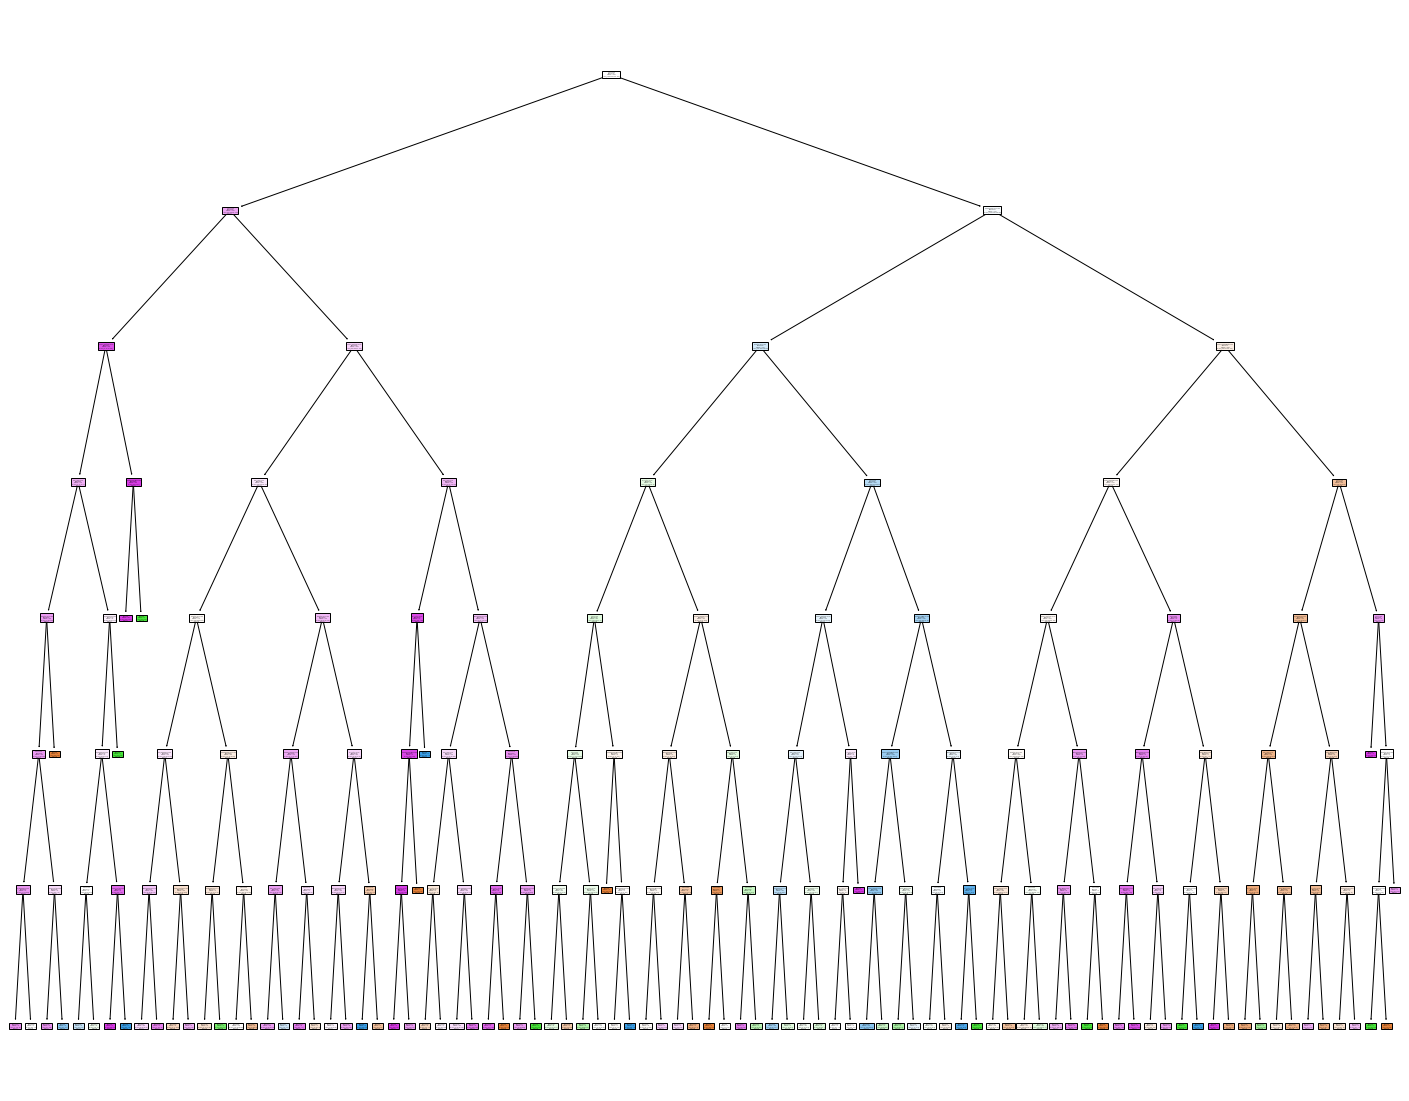

In [7]:
feature_names = X_train.columns
labels = target_names
fig = plt.figure(figsize=(25,20))
plot_tree = tree.plot_tree(dtc, 
                           feature_names=feature_names,
                           class_names=labels,
                           filled=True)

### Classification Tree

Confusion matrix: 
 [[171  41 272 208]
 [124  34 188 104]
 [ 91  31 198  61]
 [137  38 202 254]]
Classification report: 
               precision    recall  f1-score   support

           D       0.35      0.37      0.36       692
           B       0.29      0.25      0.27       450
           C       0.26      0.34      0.30       381
           A       0.44      0.38      0.41       631

    accuracy                           0.34      2154
   macro avg       0.33      0.33      0.33      2154
weighted avg       0.35      0.34      0.34      2154

DTC Accuracy: 
 0.3050139275766017


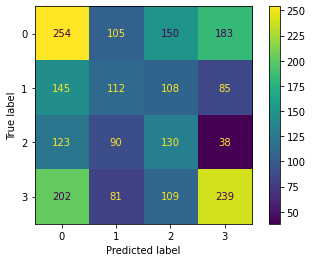

In [8]:
#fit the model
dtc = DecisionTreeClassifier(max_leaf_nodes=20)
dtc.fit(X_train, y_train)
#Model confusion matrix
cm_segmentation = confusion_matrix(y_test,y_pred)
print(f'Confusion matrix: \n {cm_segmentation}')
dtc_report = classification_report(y_test, dtc.predict(X_test),target_names=target_names)
print(f'Classification report: \n {dtc_report}')
cm = ConfusionMatrixDisplay(confusion_matrix(y_test, dtc.predict(X_test)))
cm.plot()

#dtc Model Accuracy
dtc_accuracy = metrics.accuracy_score(y_test,y_pred)
print(f'DTC Accuracy: \n {dtc_accuracy}')

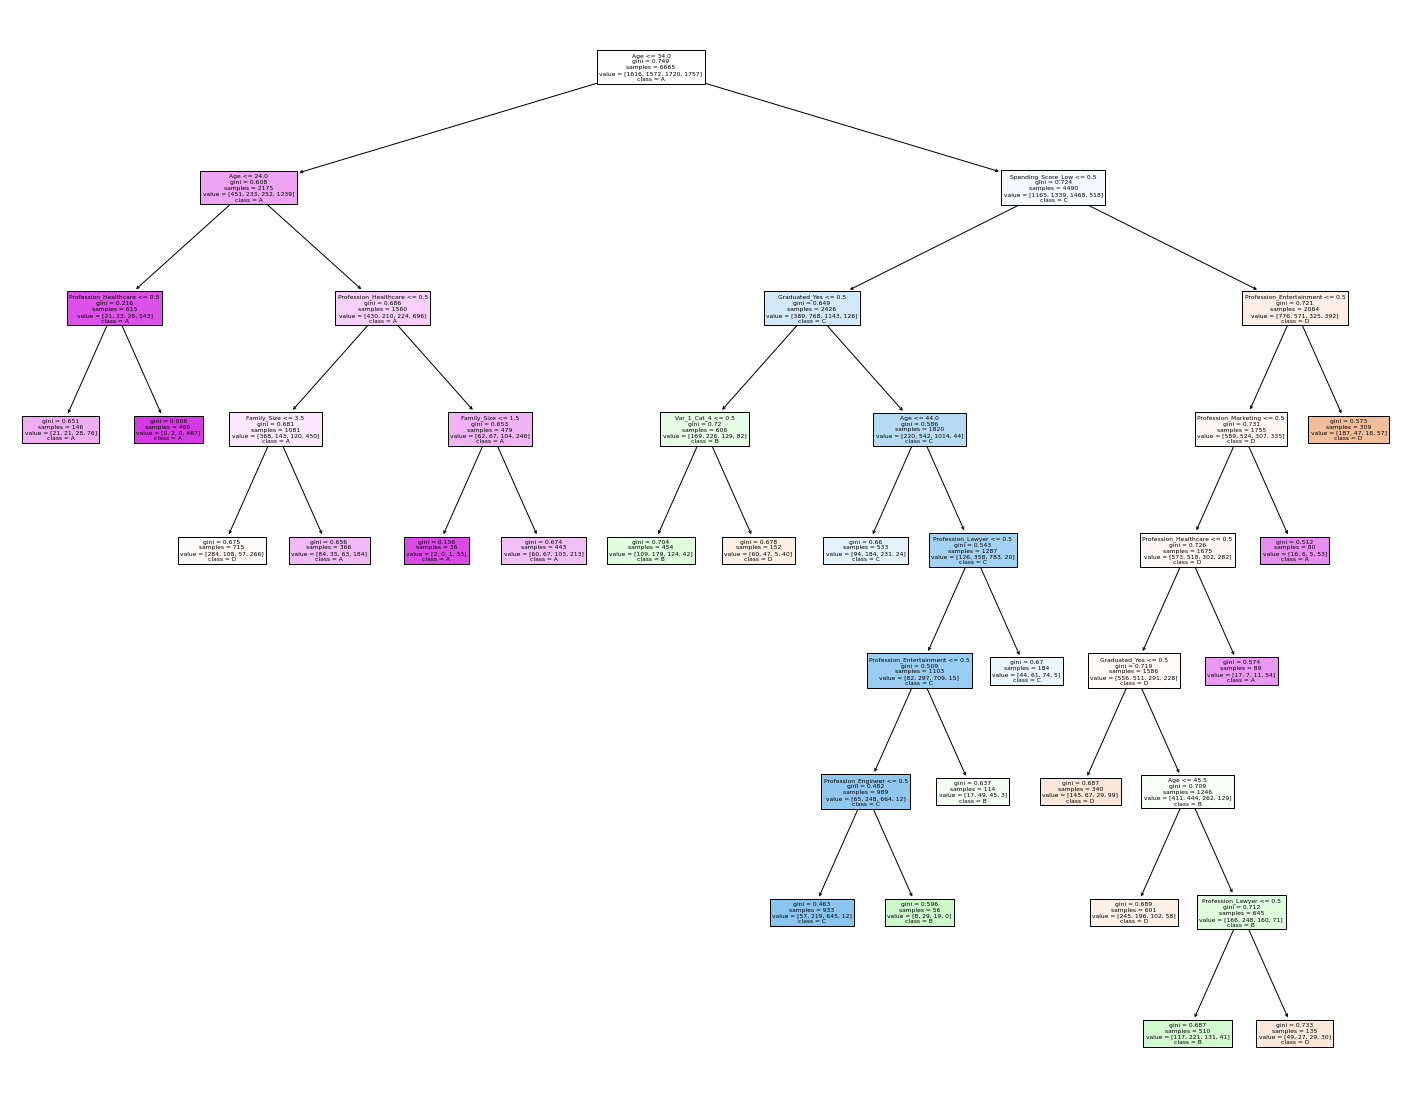

In [9]:
feature_names = X_train.columns
labels = target_names
fig = plt.figure(figsize=(25,20))
plot_tree = tree.plot_tree(dtc, 
                           feature_names=feature_names,
                           class_names=labels,
                           filled=True)

### Random Forest

In [26]:
rf = RandomForestClassifier(n_estimators=500, random_state=0, max_depth = 7)
rf.fit(X_train, y_train.values.ravel())

rf_report = classification_report(y_test, rf.predict(X_test),target_names=labels)
print(f'Classification report: \n {rf_report}')

rf_pred = rf.predict(X_test)
print(f'Accuracy: \n {rf.score(X_test, y_test)}')

Classification report: 
               precision    recall  f1-score   support

           D       0.34      0.30      0.32       692
           B       0.27      0.16      0.20       450
           C       0.26      0.41      0.32       381
           A       0.44      0.46      0.45       631

    accuracy                           0.34      2154
   macro avg       0.33      0.33      0.32      2154
weighted avg       0.34      0.34      0.33      2154

Accuracy: 
 0.33797585886722376


In [27]:
fimp = pd.DataFrame({'Features':np.array(feature_names),'Importance':np.array(rf.feature_importances_)})
fimp.sort_values(by=['Importance'], ascending=False,inplace=True)
fimp

,Features,Importance
0,Age,0.275399
15,Spending_Score_Low,0.142523
10,Profession_Healthcare,0.141723
5,Graduated_Yes,0.096385
4,Ever_Married_Yes,0.087763
2,Family_Size,0.067041
1,Work_Experience,0.030627
8,Profession_Entertainment,0.022836
18,Var_1_Cat_4,0.018814
13,Profession_Marketing,0.018566


Text(0, 0.5, 'Feature Names')

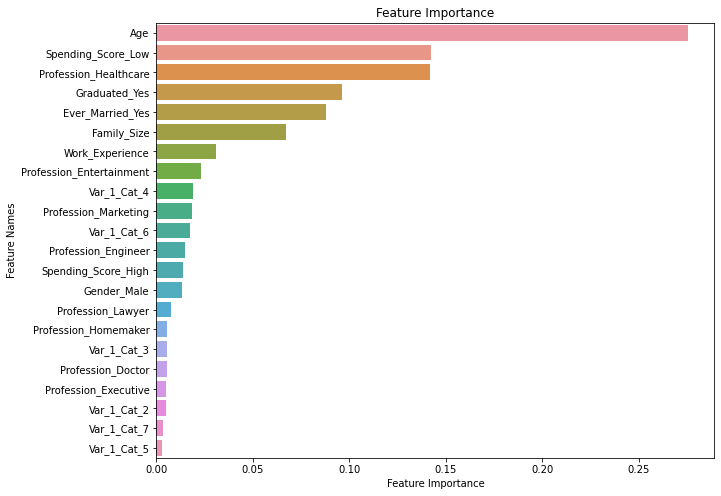

In [28]:
plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Features',data=fimp)

plt.title('Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')

---

## References


https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/naive_bayes.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html